In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import metrics
%matplotlib inline

## Get Dataset

In [2]:
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import mnist

In [ ]:
# (ds_train, ds_test), ds_info = tfds.load(
#     'mnist',
#     split=['train', 'test'],
#     shuffle_files=True,
#     as_supervised=True,
#     with_info=True,
# )

In [ ]:
# def normalize_img(image, label):
#   """Normalizes images: `uint8` -> `float32`."""
#   return tf.cast(image, tf.float32) / 255., label

# ds_train = ds_train.map(
#     normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
# ds_train = ds_train.cache()
# ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
# ds_train = ds_train.batch(128)
# ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [ ]:
# ds_test = ds_test.map(
#     normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
# ds_test = ds_test.batch(128)
# ds_test = ds_test.cache()
# ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
plt.imshow(x_train[10], cmap = "gray")
plt.show()

## Custom Loss

In [ ]:
# Might Need to implement the loss function defined in EWC
def custom_loss_fn(y_true, y_pred):
    squared_difference = tf.square(y_true - y_pred)
    return tf.reduce_mean(squared_difference, axis=-1) 

## Model 1

In [ ]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(400, activation='relu'),
  tf.keras.layers.Dense(400, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_1.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
model_1.fit(x_train, 
            y_train,
            batch_size = 32,
            epochs = 20,
            verbose = True)

## Model 2 - Range Hyperparameters

In [ ]:
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_2.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
model_2.fit(x_train, 
            y_train,
            batch_size = 32,
            epochs = 100,
            verbose = True
)

## Model 3

In [ ]:
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model_3.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
model_3.fit(x_train, 
            y_train,
            batch_size = 32,
            epochs = 100,
            verbose = True
)

## Evaluation

### Select Model

In [ ]:
model = model_1

### Get Fraction Correct Score

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
print(y_pred.shape)
print(y_test.shape)

In [ ]:
print(y_pred)
print(y_test)

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))

In [ ]:
np.unique(y_train, return_counts=True)

In [ ]:
!pip install torchvision

# Training Environment

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
from torchvision import datasets,transforms

## Data_loading module

In [5]:
import numpy as np
from torchvision import datasets,transforms
from torch.utils.data import Dataset


def permutate_image_pixels(image, permutation):
    '''Permutate the pixels of an image according to [permutation].
    [image]         3D-tensor containing the image
    [permutation]   <ndarray> of pixel-indeces in their new order'''

    if permutation is None:
        return image
    else:
        c, h, w = image.size()
        image = image.view(c, -1)
        image = image[:, permutation[1]]  #--> same permutation for each channel
        image = image.view(c, h, w)
        return image

class TransformedDataset(Dataset):
    '''To modify an existing dataset with a transform.
    This is useful for creating different permutations of MNIST without loading the data multiple times.'''

    def __init__(self, original_dataset, transform=None, target_transform=None):
        super().__init__()
        self.dataset = original_dataset
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        (input, target) = self.dataset[index]
        if self.transform:
            input = self.transform(input)
        if self.target_transform:
            target = self.target_transform(target)
        return (input, target)

def permute_train_test_data(mnist_trainset, mnist_testset) :
        # get train and test datasets
        # generate pixel-permutations
        permutations = [np.random.permutation(32**2) for _ in range(10)]
        # specify transformed datasets per context
        train_datasets = []
        test_datasets = []
        for perm in enumerate(permutations):
            target_transform = None
            train_datasets.append(TransformedDataset(
                mnist_trainset, transform=transforms.Lambda(lambda x, p=perm: permutate_image_pixels(x, p)),
                target_transform=target_transform
            ))
            test_datasets.append(TransformedDataset(
                mnist_testset, transform=transforms.Lambda(lambda x, p=perm: permutate_image_pixels(x, p)),
                target_transform=target_transform
            ))

        return train_datasets, test_datasets





## Data Loading, Transformations and Permutation

In [6]:
dataset_tranforms = transforms.Compose([
        transforms.Pad(2),
        transforms.ToTensor(),
    ]
)

In [7]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=dataset_tranforms)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=dataset_tranforms)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [8]:
training_permutations , test_permutations = permute_train_test_data((mnist_trainset),
                                                                    (mnist_testset))

## Power Law Sampling 

In [9]:
power_law_sampling = [57927,
44078,
33969,
26483,
20867,
16603,
13329,
10790,
8802,
7232,
5981,
4978,
4167,
3508,
2968,
2523,
2155,
1849,
1592,
1377,
1195]
MAX_TASK_EXAMPLES = 57927
MIN_TASK_EXAMPLES = 1195
NUM_TASKS = 10

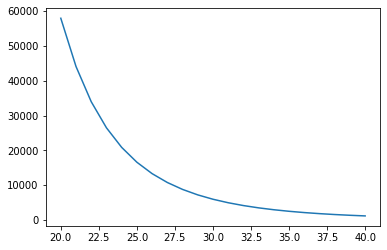

In [10]:
plt.plot([*range(20,41,1)], power_law_sampling)

Text(0.5, 1.0, 'LOG-LOG Plot')

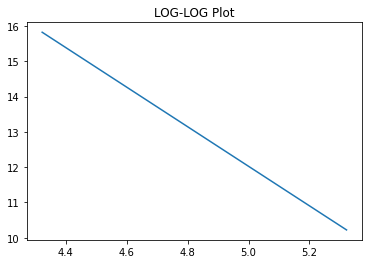

In [11]:
plt.plot(np.log2([*range(20,41,1)]), np.log2(power_law_sampling))
plt.title("LOG-LOG Plot")

## Skip Alternate Policy

In [12]:
freq_vector = []
for idx in range(0,20,2):
    freq_vector.append(power_law_sampling[idx])
freq_vector

[57927, 33969, 20867, 13329, 8802, 5981, 4167, 2968, 2155, 1592]

In [13]:
phase_task_freq_count = np.zeros((NUM_TASKS,NUM_TASKS)) 
for row in range(NUM_TASKS):
    phase_task_freq_count[row,:]+=freq_vector
    freq_vector.insert(0, 0)
    freq_vector.pop()

In [14]:
phase_task_freq_count

array([[57927., 33969., 20867., 13329.,  8802.,  5981.,  4167.,  2968.,
         2155.,  1592.],
       [    0., 57927., 33969., 20867., 13329.,  8802.,  5981.,  4167.,
         2968.,  2155.],
       [    0.,     0., 57927., 33969., 20867., 13329.,  8802.,  5981.,
         4167.,  2968.],
       [    0.,     0.,     0., 57927., 33969., 20867., 13329.,  8802.,
         5981.,  4167.],
       [    0.,     0.,     0.,     0., 57927., 33969., 20867., 13329.,
         8802.,  5981.],
       [    0.,     0.,     0.,     0.,     0., 57927., 33969., 20867.,
        13329.,  8802.],
       [    0.,     0.,     0.,     0.,     0.,     0., 57927., 33969.,
        20867., 13329.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0., 57927.,
        33969., 20867.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
        57927., 33969.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 57927.]])

In [15]:
phase_task_freq_frac=phase_task_freq_count/np.sum(phase_task_freq_count, axis=0)
phase_task_freq_frac

array([[1.        , 0.36964612, 0.18505183, 0.10570853, 0.06525123,
        0.04245608, 0.02872961, 0.0200527 , 0.01435088, 0.01049046],
       [0.        , 0.63035388, 0.30124243, 0.16549028, 0.09881092,
        0.06248092, 0.04123633, 0.0281535 , 0.01976493, 0.01420033],
       [0.        , 0.        , 0.51370574, 0.26939853, 0.15469183,
        0.09461579, 0.06068587, 0.04040943, 0.02774948, 0.01955758],
       [0.        , 0.        , 0.        , 0.45940266, 0.25181995,
        0.14812422, 0.09189752, 0.05946895, 0.03982952, 0.02745837],
       [0.        , 0.        , 0.        , 0.        , 0.42942607,
        0.24112866, 0.14386867, 0.09005473, 0.05861552, 0.03941169],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.41119432, 0.23420113, 0.14098372, 0.08876236, 0.05800062],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.39938087, 0.22950476, 0.13896048, 0.0878312 ],
       [0.        , 0.        , 0.       

### Creating Unified Testing Dataset for each phase

In [16]:
from torch.utils.data import ConcatDataset
import torch

### Power Law Distirbuted Training Environment

In [17]:
training_environments = []
np.random.seed(10)
MAX_TASK_EXAMPLES = 60000
# NUM_PHASES = NUM_TASKS
for phase in range(NUM_TASKS): 
    phase_training = []
    for task in range(NUM_TASKS):
        num_ele_to_pick = phase_task_freq_count[task,phase]
        selected_indices = np.random.choice([*range(int(MAX_TASK_EXAMPLES)+1)], int(num_ele_to_pick), replace=False)
        task_subset = torch.utils.data.Subset(training_permutations[task], selected_indices)
        phase_training.append(task_subset)
    final_phase_dataset = ConcatDataset(phase_training)
    training_environments.append(final_phase_dataset)


10
Training environment size for task  1 is : 57927
Training environment size for task  2 is : 91896
Training environment size for task  3 is : 112763
Training environment size for task  4 is : 126092
Training environment size for task  5 is : 134894
Training environment size for task  6 is : 140875
Training environment size for task  7 is : 145042
Training environment size for task  8 is : 148010
Training environment size for task  9 is : 150165
Training environment size for task  10 is : 151757


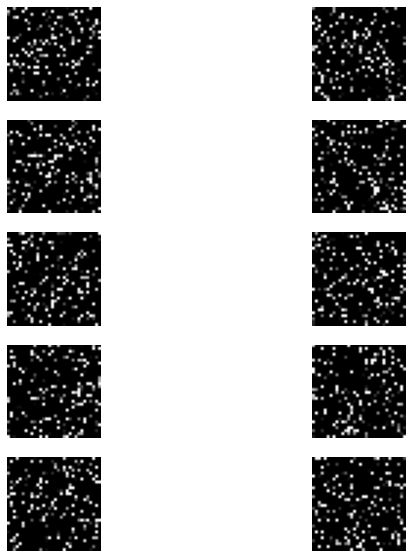

In [18]:
print(len(training_environments))
figure = plt.figure(figsize=(10, 10))
cols, rows = 2, 5
for i in range(1,NUM_TASKS+1):
  print("Training environment size for task ", i , "is :", len(training_environments[i-1]))
  img, label = training_permutations[i-1][0]
  figure.add_subplot(rows, cols, i)
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

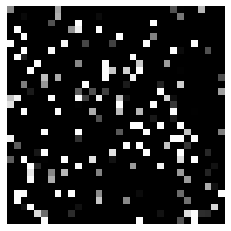

In [21]:
img, label = training_permutations[1][0]
plt.axis("off")
plt.imshow(img.squeeze(), cmap="gray")

### SGD (Lower Baseline) Training Environment

In [25]:
SGD_training_environments = []
np.random.seed(10)
MAX_TASK_EXAMPLES = 60000
# NUM_PHASES = NUM_TASKS
num_ele_to_pick = phase_task_freq_count[0,0] # to select only new task uniformly 
for phase in range(NUM_TASKS): 
    phase_training = []
    selected_indices = np.random.choice([*range(int(MAX_TASK_EXAMPLES)+1)], int(num_ele_to_pick), replace=False)
    new_task = phase # only new task for each phase
    task_subset = torch.utils.data.Subset(training_permutations[new_task], selected_indices)
    phase_training.append(task_subset)
    final_phase_dataset = ConcatDataset(phase_training)
    SGD_training_environments.append(final_phase_dataset)

10
Training environment size for task  1 is : 57927
Training environment size for task  2 is : 57927
Training environment size for task  3 is : 57927
Training environment size for task  4 is : 57927
Training environment size for task  5 is : 57927
Training environment size for task  6 is : 57927
Training environment size for task  7 is : 57927
Training environment size for task  8 is : 57927
Training environment size for task  9 is : 57927
Training environment size for task  10 is : 57927


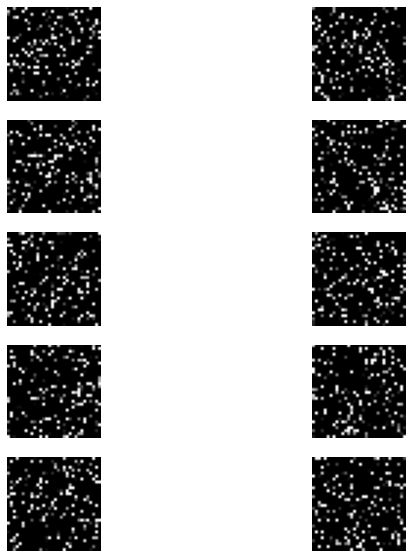

In [26]:
print(len(SGD_training_environments))
figure = plt.figure(figsize=(10, 10))
cols, rows = 2, 5
for i in range(1,NUM_TASKS+1):
  print("Training environment size for task ", i , "is :", len(SGD_training_environments[i-1]))
  img, label = training_permutations[i-1][0]
  figure.add_subplot(rows, cols, i)
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Upper Baseline Training Environment

In [27]:
UBL_training_environments = []
np.random.seed(10)
MAX_TASK_EXAMPLES = 60000
num_ele_to_pick = phase_task_freq_count[0,0]
# NUM_PHASES = NUM_TASKS
for phase in range(1): # only 1 phase is enough for upper baseline
    phase_training = []
    for task in range(NUM_TASKS):
        selected_indices = np.random.choice([*range(int(MAX_TASK_EXAMPLES)+1)], int(num_ele_to_pick), replace=False)
        task_subset = torch.utils.data.Subset(training_permutations[task], selected_indices)
        phase_training.append(task_subset)
    final_phase_dataset = ConcatDataset(phase_training)
    UBL_training_environments.append(final_phase_dataset)


In [32]:
print(len(UBL_training_environments))
figure = plt.figure(figsize=(10, 10))
cols, rows = 2, 5
for i in range(len(UBL_training_environments)):
  print("Training environment size for task ", i , "is :", len(UBL_training_environments[i-1]))
#   img, label = training_permutations[i-1][0]
#   figure.add_subplot(rows, cols, i)
#   plt.axis("off")
#   plt.imshow(img.squeeze(), cmap="gray")
# plt.show()

1
Training environment size for task  0 is : 579270


<Figure size 720x720 with 0 Axes>